## Algoritmos

### Heap Sort

No HeapSort o caso médio terá aproximadamente a mesma complexidade que o pior caso, a função `heapify()` tem complexidade de O(log n) enquanto `heapsort()` tem O(n), assim tendo uma complexidade de O(n log n).

In [100]:
def heapsort(array):
    n = len(array)
    for i in range((n//2)-1, -1, -1):
        heapify(array, n, i)
    for i in range(n-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)

def heapify(array, n, i):
    largest = i
    left = (2 * i) + 1
    right = (2 * i) + 2
    if left < n and array[i] < array[left]:
        largest = left
    if right < n and array[largest] < array[right]:
        largest = right
    if largest != i:
        array[i], array[largest] = array[largest], array[i]
        heapify(array, n, largest)

### Insetion Sort

O melhor caso é o que um array já está completamente ordenado, tendo uma complexidade de O(n). Caso contrário a complexidade será cada vez mais lenta de acordo com o tamanho do array. O pior caso é o que o array está invertido.

In [101]:
def insertionsort(array):
    for i in range(len(array)):
        value = array[i]
        j = i
        while j > 0 and value < array[j-1]:
            array[j] = array[j-1]
            j -= 1
        array[j] = value

### Tim Sort

No TimSort temos um tempo de pior caso O(n log n), porém o algoritmo tira vantagem do conceito de ter sub-vetores já ordenados dentro do algoritmo o que traz uma grande otimização de tempo e na prática acaba sendo mais rápido que a maioria dos algoritmos.

In [102]:
def timsort(array):
    MIN_RUN = 32
    lenght = len(array)
    for i in range(0, lenght, MIN_RUN):
        end = min((i+MIN_RUN)-1, lenght-1)
        alt_insort(array, i, end)
    current_size = MIN_RUN
    while current_size < lenght:
        for i in range(0, lenght, current_size*2):
            mid = min(lenght-1, (i+current_size)-1)
            end = min(lenght-1, mid+current_size)
            merge(array, i, end, mid)
        current_size *= 2
    
def merge(array, start, end, mid):
    if mid==end:
        return 
    first_part = array[start:mid+1]
    second_part = array[mid+1:end+1]
    len_first = (mid - start)+1
    len_second = end - mid
    ind_first = 0
    ind_second = 0
    ind = start
    
    while ind_first < len_first and ind_second < len_second:
        if first_part[ind_first] < second_part[ind_second]:
            array[ind] = first_part[ind_first]
            ind_first += 1
        else:
            array[ind] = second_part[ind_second]
            ind_second += 1
        ind += 1
    
    while ind_first < len_first:
        array[ind] = first_part[ind_first]
        ind_first += 1
        ind += 1
    
    while ind_second < len_second:
        array[ind] = second_part[ind_second]
        ind_second += 1
        ind += 1
        
def alt_insort(array, f_part, s_part):
    for i in range(f_part+1, s_part+1):
        j = i
        while j > f_part and array[j] < array[j-1]:
            array[j], array[j-1] = array[j-1], array[j]
            j -= 1

### Gnome Sort

No GnomeSort temos um pior caso de O(n²), porém isso irá variar de acordo com a entrada, caso o array já esteja parcialmente ordenado então teremos um tempo menos e caso já esteja ordenado teremos um tempo de O(n).

In [103]:
def gnomesort(array):
    pos = 0
    while pos < len(array):
        if (pos == 0 or array[pos] >= array[pos-1]):
            pos += 1
        else:
            array[pos], array[pos-1] = array[pos-1], array[pos]
            pos -= 1

## Testes

In [104]:
# arq1000 = list(map(int, open("1000.txt", "r").read().split()))
# arq5000 = list(map(int,open("5000.txt", "r").read().split()))
# arq10000 = list(map(int,open("10000.txt", "r").read().split()))
# arq20000 = list(map(int,open("20000.txt", "r").read().split()))
# arq50000 = list(map(int,open("50000.txt", "r").read().split()))
# arq75000 = list(map(int,open("75000.txt", "r").read().split()))
# arq100000 = list(map(int,open("100000.txt", "r").read().split()))

In [105]:
data = {
    'HeapSort': {'1000': None,'5000': None,'10000': None,'20000': None,'50000': None, '75000': None, '100000': None},
    'InsertionSort': {'1000': None,'5000': None,'10000': None,'20000': None,'50000': None, '75000': None, '100000': None},
    'TimSort': {'1000': None,'5000': None,'10000': None,'20000': None,'50000': None, '75000': None, '100000': None},
    'GnomeSort': {'1000': None,'5000': None,'10000': None,'20000': None,'50000': None, '75000': None, '100000': None}
    }

### 1000

In [106]:
import time
# from heapsort import heapsort

arq1000 = list(map(int, open("1000.txt", "r").read().split()))
array_size = len(arq1000)
start = time.time()
heapsort(arq1000)
end = time.time()
data['HeapSort']['1000'] = end - start

In [107]:
import time
# from insertiosort import insertionsort

arq1000 = list(map(int, open("1000.txt", "r").read().split()))
start = time.time()
insertionsort(arq1000)
end = time.time()
data['InsertionSort']['1000'] = end - start

In [108]:
import time
# from timsort import timsort

arq1000 = list(map(int, open("1000.txt", "r").read().split()))
start = time.time()
timsort(arq1000)
end = time.time()
data['TimSort']['1000'] = end - start

In [109]:
import time
# from gnomesort import gnomesort

arq1000 = list(map(int, open("1000.txt", "r").read().split()))
start = time.time()
gnomesort(arq1000)
end = time.time()
data['GnomeSort']['1000'] = end - start

### 5000

In [110]:
import time
# from heapsort import heapsort

arq5000 = list(map(int, open("5000.txt", "r").read().split()))
array_size = len(arq5000)
start = time.time()
heapsort(arq5000)
end = time.time()
data['HeapSort']['5000'] = end - start

In [111]:
import time
# from insertiosort import insertionsort

arq5000 = list(map(int, open("5000.txt", "r").read().split()))
start = time.time()
insertionsort(arq5000)
end = time.time()
data['InsertionSort']['5000'] = end - start

In [112]:
import time
# from timsort import timsort

arq5000 = list(map(int, open("5000.txt", "r").read().split()))
start = time.time()
timsort(arq5000)
end = time.time()
data['TimSort']['5000'] = end - start

In [113]:
import time
# from gnomesort import gnomesort

arq5000 = list(map(int, open("5000.txt", "r").read().split()))
start = time.time()
gnomesort(arq5000)
end = time.time()
data['GnomeSort']['5000'] = end - start

### 10000

In [114]:
import time
# from heapsort import heapsort

arq10000 = list(map(int, open("10000.txt", "r").read().split()))
array_size = len(arq10000)
start = time.time()
heapsort(arq10000)
end = time.time()
data['HeapSort']['10000'] = end - start

In [115]:
import time
# from insertiosort import insertionsort

arq10000 = list(map(int, open("10000.txt", "r").read().split()))
start = time.time()
insertionsort(arq10000)
end = time.time()
data['InsertionSort']['10000'] = end - start

In [116]:
import time
# from timsort import timsort

arq10000 = list(map(int, open("10000.txt", "r").read().split()))
start = time.time()
timsort(arq10000)
end = time.time()
data['TimSort']['10000'] = end - start

In [117]:
import time
# from gnomesort import gnomesort

arq10000 = list(map(int, open("10000.txt", "r").read().split()))
start = time.time()
gnomesort(arq10000)
end = time.time()
data['GnomeSort']['10000'] = end - start

### 20000

In [118]:
import time
# from heapsort import heapsort

arq20000 = list(map(int, open("20000.txt", "r").read().split()))
array_size = len(arq20000)
start = time.time()
heapsort(arq20000)
end = time.time()
data['HeapSort']['20000'] = end - start

In [119]:
import time
# from insertiosort import insertionsort

arq20000 = list(map(int, open("20000.txt", "r").read().split()))
start = time.time()
insertionsort(arq20000)
end = time.time()
data['InsertionSort']['20000'] = end - start

In [120]:
import time
# from timsort import timsort

arq20000 = list(map(int, open("20000.txt", "r").read().split()))
start = time.time()
timsort(arq20000)
end = time.time()
data['TimSort']['20000'] = end - start

In [121]:
import time
# from gnomesort import gnomesort

arq20000 = list(map(int, open("20000.txt", "r").read().split()))
start = time.time()
gnomesort(arq20000)
end = time.time()
data['GnomeSort']['20000'] = end - start

### 50000

In [122]:
import time
# from heapsort import heapsort

arq50000 = list(map(int, open("50000.txt", "r").read().split()))
array_size = len(arq50000)
start = time.time()
heapsort(arq50000)
end = time.time()
data['HeapSort']['50000'] = end - start

In [123]:
import time
# from insertiosort import insertionsort

arq50000 = list(map(int, open("50000.txt", "r").read().split()))
start = time.time()
insertionsort(arq50000)
end = time.time()
data['InsertionSort']['50000'] = end - start

In [124]:
import time
# from timsort import timsort

arq50000 = list(map(int, open("50000.txt", "r").read().split()))
start = time.time()
timsort(arq50000)
end = time.time()
data['TimSort']['50000'] = end - start

In [125]:
import time
# from gnomesort import gnomesort

arq50000 = list(map(int, open("50000.txt", "r").read().split()))
start = time.time()
gnomesort(arq50000)
end = time.time()
data['GnomeSort']['50000'] = end - start

### 75000

In [126]:
import time
# from heapsort import heapsort

arq75000 = list(map(int, open("75000.txt", "r").read().split()))
array_size = len(arq75000)
start = time.time()
heapsort(arq75000)
end = time.time()
data['HeapSort']['75000'] = end - start

In [127]:
import time
# from insertiosort import insertionsort

arq75000 = list(map(int, open("75000.txt", "r").read().split()))
start = time.time()
insertionsort(arq75000)
end = time.time()
data['InsertionSort']['75000'] = end - start

In [128]:
import time
# from timsort import timsort

arq75000 = list(map(int, open("75000.txt", "r").read().split()))
start = time.time()
timsort(arq75000)
end = time.time()
data['TimSort']['75000'] = end - start

In [129]:
import time
# from gnomesort import gnomesort

arq75000 = list(map(int, open("75000.txt", "r").read().split()))
start = time.time()
gnomesort(arq75000)
end = time.time()
data['GnomeSort']['75000'] = end - start

### 100000

In [130]:
import time
# from heapsort import heapsort

arq100000 = list(map(int, open("100000.txt", "r").read().split()))
array_size = len(arq100000)
start = time.time()
heapsort(arq100000)
end = time.time()
data['HeapSort']['100000'] = end - start

In [131]:
import time
# from insertiosort import insertionsort

arq100000 = list(map(int, open("100000.txt", "r").read().split()))
start = time.time()
insertionsort(arq100000)
end = time.time()
data['InsertionSort']['100000'] = end - start

In [132]:
import time
# from timsort import timsort

arq100000 = list(map(int, open("100000.txt", "r").read().split()))
start = time.time()
timsort(arq100000)
end = time.time()
data['TimSort']['100000'] = end - start

In [133]:
import time
# from gnomesort import gnomesort

arq100000 = list(map(int, open("100000.txt", "r").read().split()))
start = time.time()
gnomesort(arq100000)
end = time.time()
data['GnomeSort']['100000'] = end - start

## Comparações

In [134]:
import pandas as pd

datapd = pd.DataFrame(data)
datapd

,HeapSort,InsertionSort,TimSort,GnomeSort
1000,0.007580,0.060229,0.005435,0.137401
5000,0.029235,1.137044,0.025082,3.270600
10000,0.062854,4.429646,0.039360,12.985212
20000,0.129143,17.876635,0.086205,52.524848
50000,0.365553,116.685898,0.227420,341.151480
75000,0.577449,272.466663,0.352443,787.697319
100000,0.770815,488.803511,0.473858,1400.497933


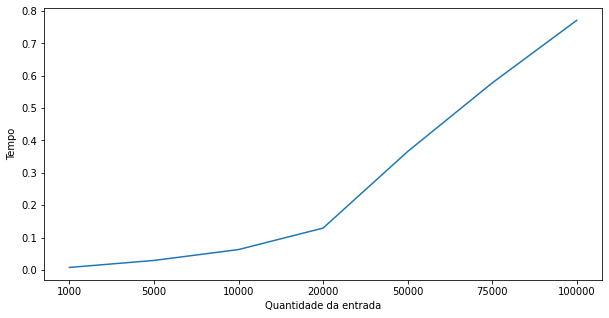

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd['HeapSort'])

Podemos ver um crescimento grande junto com as entradas, sendo um crescimento linear com uma alta angulação após 50000.


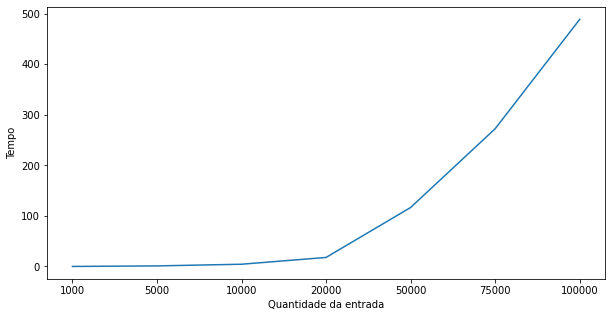

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd['InsertionSort'])

A partir de 20000 entradas o tempo de execução do algoritmo tem um aumento muito drástico.

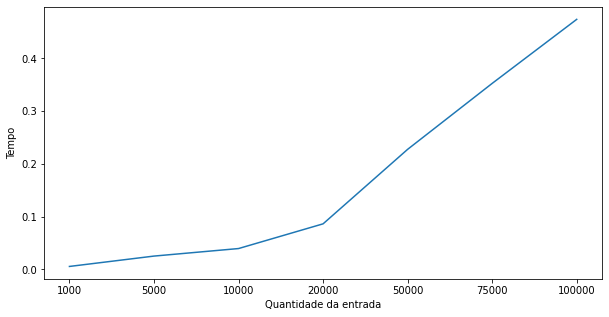

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd['TimSort'])

Até 20000 entradas o tempo aumento como uma curva, após 20000 o tempo de execução aumenta de forma linear.

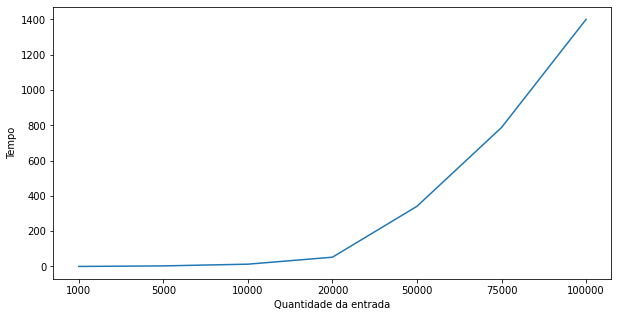

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd['GnomeSort'])

Existe um certo padrao conforme o numero de entradas aumenta, tendo "cotovelos" em cada entrada.

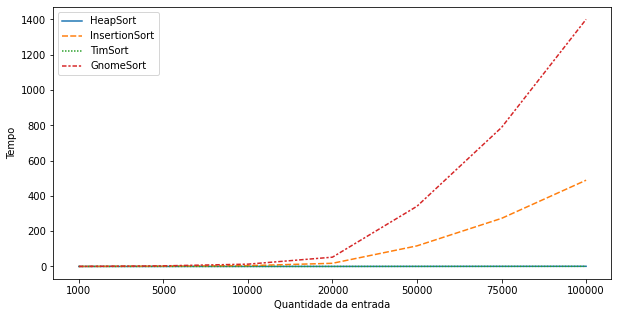

In [139]:
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd)

GnomeSort sendo o pior algoritmo em tempo de execução, InsertionSort apesar de ter um tempo de execução melhor que GnomeSort, ainda é mais lento que HeapSort e TimSort.

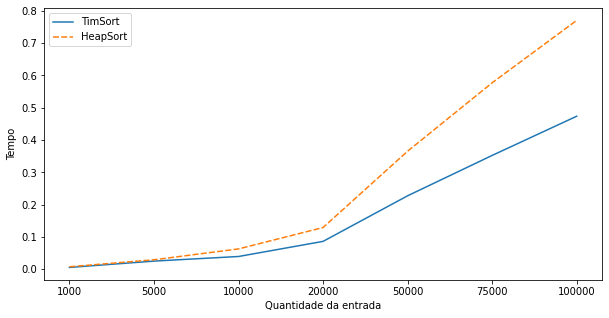

In [140]:
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Quantidade da entrada')
ax.set_ylabel('Tempo')
sns.lineplot(data=datapd.loc[:,['TimSort', 'HeapSort']])

Aqui vemos que quanto maior a entrada mais eficiente é o TimSort em comparação com outros algoritmos, em parte graças ao crescimento linear do tempo de execução.

## Melhor, pior e médio caso

In [141]:
data_casos = {
    "HeapSort": {"Melhor": None, "Medio": None, "Pior": None},
    "InsertionSort": {"Melhor": None, "Medio": None, "Pior": None},
    "TimSort": {"Melhor": None, "Medio": None, "Pior": None},
    "GnomeSort": {"Melhor": None, "Medio": None, "Pior": None}
}

In [142]:
# melhor = list(map(int,open("melhor.txt", "r").read().split()))
# pior = list(map(int,open("pior.txt", "r").read().split()))
# medio = list(map(int,open("medio.txt", "r").read().split()))

### Melhor caso

In [143]:
from time import time

melhor = list(map(int,open("melhor.txt", "r").read().split()))
start = time()
heapsort(melhor)
end = time()
data_casos['HeapSort']['Melhor'] = end - start

In [144]:
from time import time

melhor = list(map(int,open("melhor.txt", "r").read().split()))
start = time()
insertionsort(melhor)
end = time()
data_casos['InsertionSort']['Melhor'] = end - start

In [145]:
from time import time

melhor = list(map(int,open("melhor.txt", "r").read().split()))
start = time()
timsort(melhor)
end = time()
data_casos['TimSort']['Melhor'] = end - start

In [146]:
from time import time

melhor = list(map(int,open("melhor.txt", "r").read().split()))
start = time()
gnomesort(melhor)
end = time()
data_casos['GnomeSort']['Melhor'] = end - start

### Pior caso

In [147]:
from time import time

pior = list(map(int,open("pior.txt", "r").read().split()))
start = time()
heapsort(pior)
end = time()
data_casos['HeapSort']['Pior'] = end - start

In [148]:
from time import time

pior = list(map(int,open("pior.txt", "r").read().split()))
start = time()
insertionsort(pior)
end = time()
data_casos['InsertionSort']['Pior'] = end - start

In [149]:
from time import time

pior = list(map(int,open("pior.txt", "r").read().split()))
start = time()
timsort(pior)
end = time()
data_casos['TimSort']['Pior'] = end - start

In [150]:
from time import time

pior = list(map(int,open("pior.txt", "r").read().split()))
start = time()
gnomesort(pior)
end = time()
data_casos['GnomeSort']['Pior'] = end - start

### Médio caso

In [151]:
from time import time

medio = list(map(int,open("medio.txt", "r").read().split()))
start = time()
heapsort(medio)
end = time()
data_casos['HeapSort']['Medio'] = end - start

In [152]:
from time import time

medio = list(map(int,open("medio.txt", "r").read().split()))
start = time()
insertionsort(medio)
end = time()
data_casos['InsertionSort']['Medio'] = end - start

In [153]:
from time import time

medio = list(map(int,open("medio.txt", "r").read().split()))
start = time()
timsort(medio)
end = time()
data_casos['TimSort']['Medio'] = end - start

In [154]:
from time import time

medio = list(map(int,open("medio.txt", "r").read().split()))
start = time()
gnomesort(medio)
end = time()
data_casos['GnomeSort']['Medio'] = end - start

### Comparação

In [155]:
import pandas as pd

data = pd.DataFrame(data_casos)
data

,HeapSort,InsertionSort,TimSort,GnomeSort
Melhor,0.361903,0.007964,0.103692,0.016691
Medio,0.361327,27.481223,0.158612,81.115587
Pior,0.313272,216.686522,0.285528,639.313112


InsertionSort tem disparadamente o melhor tempo para uma entrada já ordenada, porém nos outros casos só não é mais lento que o GnomeSort.

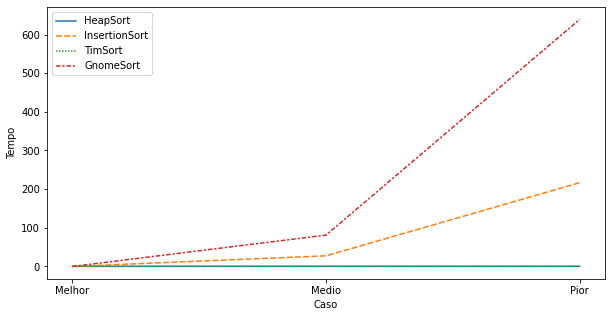

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Caso')
ax.set_ylabel('Tempo')
sns.lineplot(data=data)

Assim como nos outros testes o GnomeSort e InsertionSort se mostram piores de acordo com o quão ordenada está a entrada.

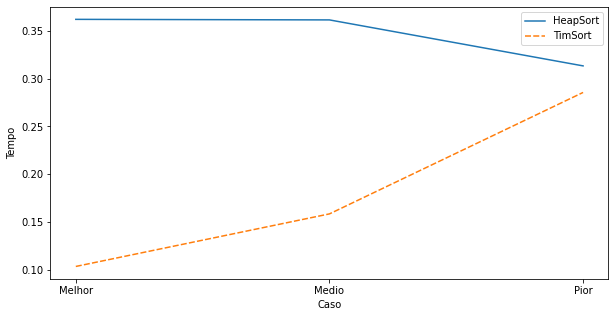

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=[10, 5])
ax.set_xlabel('Caso')
ax.set_ylabel('Tempo')
sns.lineplot(data=data.loc[:, ['HeapSort','TimSort']])